In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
place = pd.read_excel("서울시 장애인 현황_장애유형별동별 통계1.xlsx")
subway = pd.read_excel("10월 장애인 지하철 위도 경도.xlsx")
calltaxi = pd.read_excel("calltaxi.xlsx")
elevator = pd.read_excel('elevator.xlsx')
lift = pd.read_excel('lift.xlsx')

In [3]:
place['위도'][2] = 37.5673636409446
place['경도'][2] = 126.85140890423166
place['위도'][10] = 37.51521579011889
place['경도'][10] = 126.85476714018017
place['위도'][52] = 37.61710276725919
place['경도'][52] = 127.02585778442833
place['위도'][73] = 37.62270994119903
place['경도'][73] = 127.01401914773479
place['위도'][177] = 37.508581015052435
place['경도'][177] = 126.88624506998168
place['위도'][215] = 37.481612833472084
place['경도'][215] = 126.92733531529046
place['위도'][230] = 37.5673636409446
place['경도'][230] = 126.85140890423166
place['위도'][269] = 37.482542110913435
place['경도'][269] = 126.90778429785055
place['위도'][292] = 37.5673636409446
place['경도'][292] = 126.85140890423166
place['위도'][349] = 37.555892012112004
place['경도'][349] = 126.94238999785267
place['위도'][423] = 37.56243468416386
place['경도'][423] = 126.97699754610015

# place['위도'][22] = 37.63507017246127
# place['경도'][22] = 126.92085322484077
# place['위도'][24] = 37.60058867951366
# place['경도'][24] = 127.1013623401825634
# place['위도'][29] = 37.50020953849197
# place['경도'][29] = 126.85105696901545
# place['위도'][34] = 37.561059398977115
# place['경도'][34] = 126.86054828435971
# place['위도'][104] = 37.45245528598426
# place['경도'][104] = 126.90823145367155
# place['위도'][121] = 37.449650567301774
# place['경도'][121] = 126.91436208250717

# place['위도'][130] = 37.45899847841244
# place['경도'][130] = 126.906173411343051
# place['위도'][136] = 37.553748174173656
# place['경도'][136] = 126.87090334018127
# place['위도'][142] = 37.546097205810604
# place['경도'][142] = 126.87171342668796
# place['위도'][162] = 37.463117241851485
# place['경도'][162] = 126.90351938143831

# place['위도'][196] = 37.44937383758837
# place['경도'][196] = 127.0582295536714
# place['위도'][197] = 37.54491397980185
# place['경도'][197] = 126.86230016716706

# place['위도'][215] = 37.48159762138348
# place['경도'][215] = 126.92730581134364
# place['위도'][223] = 37.467483717972314
# place['경도'][223] = 126.90213566901458
# place['위도'][256] = 37.542635993594715
# place['경도'][256] = 126.86246004018106

# place['위도'][272] = 37.55584580135858
# place['경도'][272] = 126.8588980978525
# place['위도'][329] = 37.44031780256928
# place['경도'][329] = 126.90577496901382
# place['위도'][341] = 37.60623723034555
# place['경도'][341] = 126.96806111452997
# place['위도'][402] = 37.59241798343251
# place['경도'][402] = 126.96400424018219

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [4]:
place

,동,위도,경도,거주자
0,등촌3동,37.558867,126.847705,101246
1,중계2.3동,37.640611,127.065154,86490
2,가양2동,37.567364,126.851409,65348
3,구산동,37.611722,126.910308,61783
4,월계2동,37.632472,127.050738,61380
5,공릉1동,37.624835,127.073792,59830
6,수서동,37.488963,127.105154,58497
7,역촌동,37.604452,126.916954,57536
8,하계1동,37.640528,127.072542,57040
9,화곡1동,37.530398,126.841594,55056


In [5]:
subway['위도'][2] = 37.5718022780947
subway['경도'][2] = 127.0109383714481

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
subway

,역명,위도,경도,하차
0,종로3가역,37.570436,126.992148,55717
1,서울역,37.555946,126.972317,41839
2,동대문역,37.571802,127.010938,36959
3,신림역,37.462618,126.938325,34753
4,잠실역,37.513261,127.100134,33994
5,노원역,37.654527,127.060551,33522
6,청량리역,37.581381,127.048958,33319
7,동묘앞역,37.573246,127.016589,33027
8,연신내역,37.618812,126.920842,31534
9,사당역,37.476559,126.981633,30206


In [7]:
elevator

,역,대수
0,동대문역,5
1,동묘앞역,9
2,서울역,6
3,시청역,5
4,신설동역,7
5,제기동역,3
6,종각역,4
7,종로3가역,6
8,종로5가역,3
9,청량리역,1


In [8]:
lift

,역,대수
0,서울역,2
1,신설동역,12
2,청량리역,2
3,삼성역,1
4,신정네거리역,1
5,용답역,2
6,잠실역,4
7,한양대역,1
8,고속터미널역,5
9,교대역,1


In [9]:
val = []
val_index = []
for x in range(len(elevator)):
    for y in range(len(subway)):
        if elevator['역'][x] == subway['역명'][y]:
            val.append(elevator['대수'][x])
            val_index.append(y)

In [10]:
series = pd.Series(val, index = val_index)

In [11]:
subway['엘레베이터'] = series

In [12]:
val1 = []
val_index1 = []
for x in range(len(lift)):
    for y in range(len(subway)):
        if lift['역'][x] == subway['역명'][y]:
            val1.append(lift['대수'][x])
            val_index1.append(y)

In [13]:
series1 = pd.Series(val1, index = val_index1)

In [14]:
subway['리프트'] = series1

In [15]:
subway

,역명,위도,경도,하차,엘레베이터,리프트
0,종로3가역,37.570436,126.992148,55717,6.0,1.0
1,서울역,37.555946,126.972317,41839,6.0,2.0
2,동대문역,37.571802,127.010938,36959,5.0,1.0
3,신림역,37.462618,126.938325,34753,3.0,NaN
4,잠실역,37.513261,127.100134,33994,7.0,4.0
5,노원역,37.654527,127.060551,33522,7.0,NaN
6,청량리역,37.581381,127.048958,33319,1.0,2.0
7,동묘앞역,37.573246,127.016589,33027,9.0,2.0
8,연신내역,37.618812,126.920842,31534,3.0,NaN
9,사당역,37.476559,126.981633,30206,5.0,1.0


In [16]:
subway= subway.fillna(0)
subway

,역명,위도,경도,하차,엘레베이터,리프트
0,종로3가역,37.570436,126.992148,55717,6.0,1.0
1,서울역,37.555946,126.972317,41839,6.0,2.0
2,동대문역,37.571802,127.010938,36959,5.0,1.0
3,신림역,37.462618,126.938325,34753,3.0,0.0
4,잠실역,37.513261,127.100134,33994,7.0,4.0
5,노원역,37.654527,127.060551,33522,7.0,0.0
6,청량리역,37.581381,127.048958,33319,1.0,2.0
7,동묘앞역,37.573246,127.016589,33027,9.0,2.0
8,연신내역,37.618812,126.920842,31534,3.0,0.0
9,사당역,37.476559,126.981633,30206,5.0,1.0


In [17]:
calltaxi['위도'][12] = 37.522015448172475
calltaxi['경도'][12] = 126.9270919460588

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
calltaxi

,목적지,이용건수,위도,경도
0,하계1동,1703,37.640528,127.072542
1,신촌동,1650,37.559479,126.943584
2,상계6.7동,1362,37.653026,127.058154
3,역촌동,1178,37.604452,126.916954
4,성산2동,1130,37.568571,126.908983
5,이화동,987,37.576923,127.004300
6,상암동,878,37.578171,126.894616
7,연희동,795,37.571798,126.932525
8,가양2동,786,36.347608,127.451359
9,신내1동,785,37.605782,127.099456


### 동과 최소거리 지하철역 찾기

In [19]:
from haversine import haversine

In [20]:
a = (place['위도'], place['경도'])
b = (subway['위도'],subway['경도'])

In [21]:
distance = []
for x in tqdm(range(len(place))):
    for y in range(len(subway)):
        distance.append([place['동'][x],subway['역명'][y],haversine((a[0][x],a[1][x]), (b[0][y],b[1][y]), unit = 'km')])

100%|████████████████████████████████████████████████████████████████████████████████| 425/425 [00:04<00:00, 93.24it/s]


In [22]:
distance

[['등촌3동', '종로3가역', 12.79610702589619],
 ['등촌3동', '서울역', 10.989228481832628],
 ['등촌3동', '동대문역', 14.459059551587229],
 ['등촌3동', '신림역', 13.357801713459322],
 ['등촌3동', '잠실역', 22.828093450363962],
 ['등촌3동', '노원역', 21.556860067919196],
 ['등촌3동', '청량리역', 17.913038696093864],
 ['등촌3동', '동묘앞역', 14.97086585193617],
 ['등촌3동', '연신내역', 9.271396722453312],
 ['등촌3동', '사당역', 14.94268924152397],
 ['등촌3동', '수유역', 17.858850797168596],
 ['등촌3동', '제기동역', 16.610691231819295],
 ['등촌3동', '구로디지털단지역', 9.468763528496718],
 ['등촌3동', '신도림역', 6.759753909528148],
 ['등촌3동', '천호역', 24.55788024277197],
 ['등촌3동', '종로5가역', 13.659284643635484],
 ['등촌3동', '미아사거리역', 17.17049154064433],
 ['등촌3동', '고속터미널역', 15.105110501957174],
 ['등촌3동', '창동역', 20.497690237011422],
 ['등촌3동', '강남역', 17.250810661133947],
 ['등촌3동', '성수역', 18.428173517073],
 ['등촌3동', '건대입구역', 19.641274912269967],
 ['등촌3동', '서울대입구역', 12.662073668613832],
 ['등촌3동', '까치산역', 3.014575044307033],
 ['등촌3동', '역삼역', 17.966012909394287],
 ['등촌3동', '대림역', 8.47461474529023],

In [23]:
number = []
for x in tqdm(range(len(place))):
    collect = []
    for y in range(len(subway)*x, len(subway)*(x+1)):
        collect.append(distance[y][2])
    min1 = min(collect)
    index = collect.index(min1)
    number.append([distance[y][0], distance[index][1], int(subway['엘레베이터'][index]), int(subway['리프트'][index]), min1, place['거주자'][x], subway['하차'][index]])
                                   

100%|█████████████████████████████████████████████████████████████████████████████| 425/425 [00:00<00:00, 12139.27it/s]


In [24]:
number

[['등촌3동', '발산역', 3, 0, 0.8914138830206324, 101246, 14789],
 ['중계2.3동', '중계역', 3, 0, 0.5089087722833514, 86490, 16360],
 ['가양2동', '발산역', 3, 0, 1.5537782007502952, 65348, 14789],
 ['구산동', '구산역', 1, 1, 0.6760084859865427, 61783, 6067],
 ['월계2동', '하계역', 3, 0, 1.5866309793434568, 61380, 15662],
 ['공릉1동', '공릉역', 3, 0, 0.13218400899562952, 59830, 10583],
 ['수서동', '수서역', 4, 0, 0.3765259931376051, 58497, 17294],
 ['역촌동', '역촌역', 2, 0, 0.5467897873506739, 57536, 4001],
 ['하계1동', '하계역', 3, 0, 0.6359509762411281, 57040, 15662],
 ['화곡1동', '까치산역', 1, 3, 0.47572105887577465, 55056, 22493],
 ['신정3동', '신정네거리역', 3, 1, 0.5818009716696859, 54901, 9244],
 ['번3동', '미아역', 3, 0, 1.802546557616865, 54064, 16924],
 ['성산2동', '마포구청역', 4, 4, 0.7512017350440112, 53010, 12642],
 ['길동', '길동역', 3, 0, 0.5618835014980289, 52452, 8174],
 ['방화3동', '방화역', 3, 0, 0.12815909203247822, 52080, 7956],
 ['양재1동', '양재역', 4, 0, 0.1568716950184125, 52080, 16841],
 ['오류2동', '천왕역', 4, 0, 0.24245195359760302, 52018, 7946],
 ['독산1동', '가산디

### 동과 콜택시 사이의 최소거리 찾기

In [25]:
c = (calltaxi['위도'],calltaxi['경도'])

In [26]:
distance1 = []
for x in tqdm(range(len(place))):
    for y in range(len(calltaxi)):
        distance1.append([place['동'][x], calltaxi['목적지'][y], haversine((a[0][x],a[1][x]), (c[0][y],c[1][y]), unit = 'km')])

100%|████████████████████████████████████████████████████████████████████████████████| 425/425 [00:05<00:00, 73.56it/s]


In [27]:
distance1

[['등촌3동', '하계1동', 21.790045111178443],
 ['등촌3동', '신촌동', 8.45169709524922],
 ['등촌3동', '상계6.7동', 21.291035533604575],
 ['등촌3동', '역촌동', 7.932839647980093],
 ['등촌3동', '성산2동', 5.507904649866375],
 ['등촌3동', '이화동', 13.947061873698276],
 ['등촌3동', '상암동', 4.658556205303026],
 ['등촌3동', '연희동', 7.613053528658459],
 ['등촌3동', '가양2동', 144.97337311186266],
 ['등촌3동', '신내1동', 22.78934193766388],
 ['등촌3동', '도봉2동', 21.401743514013326],
 ['등촌3동', '신대방2동', 9.591454382036375],
 ['등촌3동', '여의동', 8.110702694929893],
 ['등촌3동', '중계2.3동', 21.20400122492084],
 ['등촌3동', '등촌3동', 0.0],
 ['등촌3동', '방화1동', 3.4284707140024753],
 ['등촌3동', '세곡동', 24.97153654452192],
 ['등촌3동', '진관동', 12.385567980189657],
 ['등촌3동', '풍납2동', 23.931986215197814],
 ['등촌3동', '발산1동', 1.4215739748592309],
 ['등촌3동', '보라매동', 10.869768703792976],
 ['등촌3동', '신정3동', 4.911093499887501],
 ['등촌3동', '상일동', 27.95397871293891],
 ['등촌3동', '월계2동', 19.67151116428756],
 ['등촌3동', '휘경2동', 19.71803354763011],
 ['등촌3동', '수서동', 23.997794150488275],
 ['등촌3동', '구로5동', 7.4

In [28]:
number1 = []
for x in tqdm(range(len(place))):
    collect1 = []
    for y in range(len(calltaxi)*x, len(calltaxi)*(x+1)):
        collect1.append(distance1[y][2])
    min2 = min(collect1)
    index1 = collect1.index(min2)
    number1.append([distance1[y][0], number[x][1], number[x][2], number[x][3],number[x][4], distance1[index1][1], min2, number[x][6], 
                calltaxi['이용건수'][index1], place['거주자'][x], (number[x][6])/(place['거주자'][x])*100, (calltaxi['이용건수'][index1])/(place['거주자'][x])*100])
                                   

100%|█████████████████████████████████████████████████████████████████████████████| 425/425 [00:00<00:00, 10110.88it/s]


In [29]:
number1

[['등촌3동',
  '발산역',
  3,
  0,
  0.8914138830206324,
  '등촌3동',
  0.0,
  14789,
  660,
  101246,
  14.60699681962744,
  0.6518776050411867],
 ['중계2.3동',
  '중계역',
  3,
  0,
  0.5089087722833514,
  '중계2.3동',
  0.0,
  16360,
  712,
  86490,
  18.915481558561684,
  0.8232165568273788],
 ['가양2동',
  '발산역',
  3,
  0,
  1.5537782007502952,
  '가양1동',
  0.9951292402103281,
  14789,
  371,
  65348,
  22.631144028891473,
  0.5677296933341495],
 ['구산동',
  '구산역',
  1,
  1,
  0.6760084859865427,
  '구산동',
  0.0,
  6067,
  490,
  61783,
  9.819853357719762,
  0.7930984251331272],
 ['월계2동',
  '하계역',
  3,
  0,
  1.5866309793434568,
  '월계2동',
  0.0,
  15662,
  533,
  61380,
  25.516454871293583,
  0.8683610296513522],
 ['공릉1동',
  '공릉역',
  3,
  0,
  0.13218400899562952,
  '월계3동',
  0.5920632227604388,
  10583,
  456,
  59830,
  17.688450610061842,
  0.7621594517800434],
 ['수서동',
  '수서역',
  4,
  0,
  0.3765259931376051,
  '수서동',
  0.0,
  17294,
  524,
  58497,
  29.56390926030395,
  0.8957724327743303],
 ['역촌동

### 데이터프레임 생성

In [30]:
df = pd.DataFrame(number1, columns=['지역','지하철역','승강기', '리프트','역_거리','목적지', '목적지_거리','하차 수','이용 수','거주자 수',
                                   '하차/거주자', '이용/거주자'])


In [31]:
df

,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
0,등촌3동,발산역,3,0,0.891414,등촌3동,0.000000,14789,660,101246,14.606997,0.651878
1,중계2.3동,중계역,3,0,0.508909,중계2.3동,0.000000,16360,712,86490,18.915482,0.823217
2,가양2동,발산역,3,0,1.553778,가양1동,0.995129,14789,371,65348,22.631144,0.567730
3,구산동,구산역,1,1,0.676008,구산동,0.000000,6067,490,61783,9.819853,0.793098
4,월계2동,하계역,3,0,1.586631,월계2동,0.000000,15662,533,61380,25.516455,0.868361
5,공릉1동,공릉역,3,0,0.132184,월계3동,0.592063,10583,456,59830,17.688451,0.762159
6,수서동,수서역,4,0,0.376526,수서동,0.000000,17294,524,58497,29.563909,0.895772
7,역촌동,역촌역,2,0,0.546790,역촌동,0.000000,4001,1178,57536,6.953907,2.047414
8,하계1동,하계역,3,0,0.635951,하계1동,0.000000,15662,1703,57040,27.457924,2.985624
9,화곡1동,까치산역,1,3,0.475721,화곡1동,0.000000,22493,32,55056,40.854766,0.058123


In [32]:
df.describe()

,승강기,리프트,역_거리,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
count,425.0000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,3.2000,0.621176,0.701204,0.272584,13336.336471,160.254118,24286.931765,93.800359,0.924468
std,1.3598,1.648334,0.556515,0.407420,8398.741154,255.187013,13079.682449,367.224685,2.369639
min,0.0000,0.000000,0.000000,0.000000,771.000000,3.000000,93.000000,5.224993,0.008422
25%,3.0000,0.000000,0.346716,0.000000,7157.000000,8.000000,14818.000000,29.807830,0.044679
50%,3.0000,0.000000,0.538547,0.000000,10536.000000,38.000000,21359.000000,50.693839,0.202948
75%,4.0000,0.000000,0.925042,0.542962,17294.000000,211.000000,31000.000000,85.032156,0.924835
max,9.0000,12.000000,3.798009,2.072945,55717.000000,1703.000000,101246.000000,6909.677419,26.774194


In [33]:
from matplotlib import font_manager, rc 

In [34]:
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

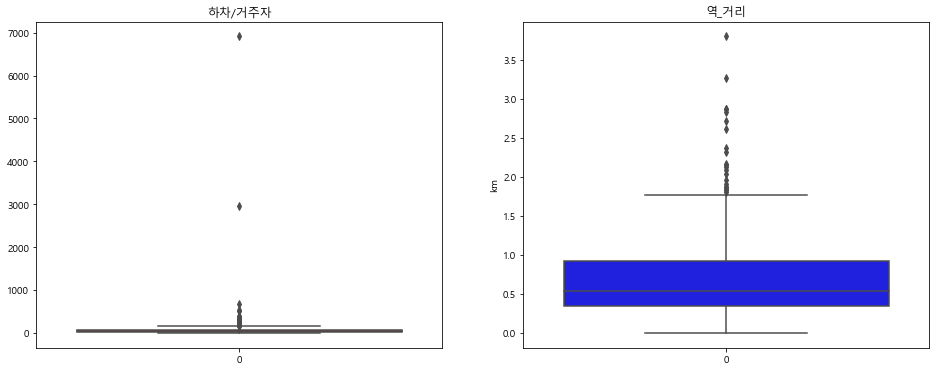

In [35]:
f,ax = plt.subplots(1,2, figsize=(16,6))

sns.boxplot(data=df['하차/거주자'], color='red', ax=ax[0])
ax[0].set_title('하차/거주자')

sns.boxplot(data=df['역_거리'], color='blue', ax=ax[1])
plt.ylabel('km')
ax[1].set_title('역_거리')

plt.show()

In [36]:
def find_outlier(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    Minimum_data = q1 - (iqr*1.5)
    Maximum_data = q3 + (iqr*1.5)
    out_index = np.where((data>Maximum_data)|(data<Minimum_data))
    return out_index

In [37]:
out_index = find_outlier(df['하차/거주자'])[0]
out_index

array([237, 260, 262, 275, 322, 329, 358, 361, 377, 379, 385, 392, 399,
       400, 404, 407, 410, 411, 412, 416, 417, 418, 419, 420, 421, 422,
       423, 424], dtype=int64)

In [38]:
df['하차/거주자'][out_index]

237     174.620641
260     188.098073
262     186.176680
275     168.287927
322     236.511501
329     241.608732
358     284.540765
361     189.967663
377     291.089371
379     208.015369
385     531.752243
392     253.083955
399     385.235287
400     240.000000
404     205.540507
407     196.249672
410     378.718242
411     257.048166
412     402.129350
416     349.649369
417     513.410428
418     201.948474
419     385.121791
420     276.238479
421     330.662886
422     676.155187
423    2958.870968
424    6909.677419
Name: 하차/거주자, dtype: float64

In [39]:
df['하차/거주자'] = df['하차/거주자'].drop(index=out_index)

In [40]:
df['지하철역'][out_index]

237           신림역
260           신림역
262           잠실역
275           사당역
322           신림역
329           신림역
358          동대문역
361           강남역
377          동묘앞역
379           성수역
385         종로3가역
392           강남역
399          청량리역
400           혜화역
404           회현역
407           삼성역
410         종로5가역
411    동대문역사문화공원역
412        고속터미널역
416    동대문역사문화공원역
417        고속터미널역
418           안국역
419          충무로역
420           명동역
421           안국역
422        을지로3가역
423           시청역
424          둔촌동역
Name: 지하철역, dtype: object

In [41]:
out_index1 = find_outlier(df['역_거리'])[0]
out_index1

array([ 11,  22,  24,  29,  34,  37,  93, 104, 121, 130, 136, 142, 162,
       196, 197, 223, 256, 273, 329, 341, 402], dtype=int64)

In [42]:
df['역_거리'][out_index1]

11     1.802547
22     2.123789
24     1.865938
29     1.875027
34     2.033762
37     3.268074
93     1.830004
104    2.871358
121    2.372190
130    2.874035
136    2.607953
142    2.319685
162    2.147346
196    2.834053
197    2.086990
223    1.955938
256    1.839372
273    1.907226
329    3.798009
341    2.721422
402    2.165930
Name: 역_거리, dtype: float64

In [43]:
df['지역'][out_index1]

11      번3동
22      진관동
24     망우본동
29     개봉1동
34     가양3동
37     시흥1동
93     방학2동
104    시흥5동
121    시흥2동
130    시흥4동
136     염창동
142     목2동
162    독산2동
196     내곡동
197     목3동
223    독산4동
256    등촌2동
273    등촌1동
329    시흥3동
341     평창동
402     부암동
Name: 지역, dtype: object

In [44]:
df['지하철역'][out_index1]

11          미아역
22         구파발역
24          상봉역
29          천왕역
34          발산역
37          신림역
93          쌍문역
104         신림역
121         신림역
130         신림역
136         망원역
142         목동역
162    구로디지털단지역
196         매봉역
197         목동역
223    구로디지털단지역
256        까치산역
273         발산역
329         신림역
341         홍제역
402        무악재역
Name: 지하철역, dtype: object

In [45]:
df.describe()

,승강기,리프트,역_거리,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
count,425.0000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,397.000000,425.000000
mean,3.2000,0.621176,0.701204,0.272584,13336.336471,160.254118,24286.931765,56.032099,0.924468
std,1.3598,1.648334,0.556515,0.407420,8398.741154,255.187013,13079.682449,34.144667,2.369639
min,0.0000,0.000000,0.000000,0.000000,771.000000,3.000000,93.000000,5.224993,0.008422
25%,3.0000,0.000000,0.346716,0.000000,7157.000000,8.000000,14818.000000,29.081971,0.044679
50%,3.0000,0.000000,0.538547,0.000000,10536.000000,38.000000,21359.000000,47.555356,0.202948
75%,4.0000,0.000000,0.925042,0.542962,17294.000000,211.000000,31000.000000,76.600867,0.924835
max,9.0000,12.000000,3.798009,2.072945,55717.000000,1703.000000,101246.000000,166.874552,26.774194


In [46]:
df

,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
0,등촌3동,발산역,3,0,0.891414,등촌3동,0.000000,14789,660,101246,14.606997,0.651878
1,중계2.3동,중계역,3,0,0.508909,중계2.3동,0.000000,16360,712,86490,18.915482,0.823217
2,가양2동,발산역,3,0,1.553778,가양1동,0.995129,14789,371,65348,22.631144,0.567730
3,구산동,구산역,1,1,0.676008,구산동,0.000000,6067,490,61783,9.819853,0.793098
4,월계2동,하계역,3,0,1.586631,월계2동,0.000000,15662,533,61380,25.516455,0.868361
5,공릉1동,공릉역,3,0,0.132184,월계3동,0.592063,10583,456,59830,17.688451,0.762159
6,수서동,수서역,4,0,0.376526,수서동,0.000000,17294,524,58497,29.563909,0.895772
7,역촌동,역촌역,2,0,0.546790,역촌동,0.000000,4001,1178,57536,6.953907,2.047414
8,하계1동,하계역,3,0,0.635951,하계1동,0.000000,15662,1703,57040,27.457924,2.985624
9,화곡1동,까치산역,1,3,0.475721,화곡1동,0.000000,22493,32,55056,40.854766,0.058123


In [47]:
df.dropna()

,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
0,등촌3동,발산역,3,0,0.891414,등촌3동,0.000000,14789,660,101246,14.606997,0.651878
1,중계2.3동,중계역,3,0,0.508909,중계2.3동,0.000000,16360,712,86490,18.915482,0.823217
2,가양2동,발산역,3,0,1.553778,가양1동,0.995129,14789,371,65348,22.631144,0.567730
3,구산동,구산역,1,1,0.676008,구산동,0.000000,6067,490,61783,9.819853,0.793098
4,월계2동,하계역,3,0,1.586631,월계2동,0.000000,15662,533,61380,25.516455,0.868361
5,공릉1동,공릉역,3,0,0.132184,월계3동,0.592063,10583,456,59830,17.688451,0.762159
6,수서동,수서역,4,0,0.376526,수서동,0.000000,17294,524,58497,29.563909,0.895772
7,역촌동,역촌역,2,0,0.546790,역촌동,0.000000,4001,1178,57536,6.953907,2.047414
8,하계1동,하계역,3,0,0.635951,하계1동,0.000000,15662,1703,57040,27.457924,2.985624
9,화곡1동,까치산역,1,3,0.475721,화곡1동,0.000000,22493,32,55056,40.854766,0.058123


In [69]:
df = df.reset_index()
df = df.drop(['index'], axis=1)

In [67]:
df.to_excel("거리.xlsx")

In [77]:
for x in range(len(df['역_거리'])):
    if df['역_거리'][x] > 1.2 and df['역_거리'][x] < 1.8:
        print(df['지역'][x], df['지하철역'][x], df['역_거리'][x])

가양2동 발산역 1.5537782007502952
월계2동 하계역 1.5866309793434568
독산1동 가산디지털단지역 1.6733186998411311
세곡동 복정역 1.7133874072596282
신내1동 봉화산역 1.475475795517971
난곡동 신림역 1.7674873466953391
중계4동 당고개역 1.286597438606781
신내2동 상봉역 1.2346838438521919
방학1동 창동역 1.4172222631973435
도봉1동 도봉산역 1.4234946605725343
미성동 신대방역 1.283268528991591
개봉2동 광명사거리역 1.2839720690375207
번2동 미아역 1.2701751002307855
장안2동 용마산역 1.5227979235888138
연희동 신촌역 1.5939807048231083
수유1동 수유역 1.4048460678930337
신월1동 화곡역 1.2522485840856177
남가좌2동 증산역 1.3836377964818847
신월7동 까치산역 1.5305467881125512
흑석동 상도역 1.333628839332847
고척1동 양천구청역 1.3534151339436462
정릉4동 길음역 1.636015135357579
우이동 수유역 1.6549294236412497
월계1동 하계역 1.355977817030048
화곡6동 우장산역 1.2549317464901941
신월3동 화곡역 1.340968938373506
휘경2동 중화역 1.290433134687053
신월4동 신정네거리역 1.4325443383335728
위례동 산성역 1.3877897673936483
중계본동 중계역 1.4502908135267958
신원동 봉천역 1.2600566331269742
이문1동 상월곡역 1.5072888384530985
창3동 수유역 1.6008314932730867
여의동 발산역 1.5537782007502952
정릉3동 길음역 1.7506457231582433
중계1동 중계역 1.434216

In [49]:
bins = list(range(150, 201, 10))

In [50]:
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]

In [51]:
df["level"] = pd.cut(df["height"], bins, right=False, labels=bins_label[:-1])


KeyError: 'height'

In [53]:
#raw_data['age']의 나이대를 baby, children, teenage, young, adult, old로 구분하여 
# raw_data['age_cat']파생변수를 만들어라
df['역_거리_구간'] = pd.cut(df['역_거리'],
                            bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
                            include_lowest = True,
                            labels = ['0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0']
                            )
df

,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자,역_거리_구간
0,등촌3동,발산역,3,0,0.891414,등촌3동,0.000000,14789,660,101246,14.606997,0.651878,1.0
1,중계2.3동,중계역,3,0,0.508909,중계2.3동,0.000000,16360,712,86490,18.915482,0.823217,0.6
2,가양2동,발산역,3,0,1.553778,가양1동,0.995129,14789,371,65348,22.631144,0.567730,1.6
3,구산동,구산역,1,1,0.676008,구산동,0.000000,6067,490,61783,9.819853,0.793098,0.8
4,월계2동,하계역,3,0,1.586631,월계2동,0.000000,15662,533,61380,25.516455,0.868361,1.6
5,공릉1동,공릉역,3,0,0.132184,월계3동,0.592063,10583,456,59830,17.688451,0.762159,0.2
6,수서동,수서역,4,0,0.376526,수서동,0.000000,17294,524,58497,29.563909,0.895772,0.4
7,역촌동,역촌역,2,0,0.546790,역촌동,0.000000,4001,1178,57536,6.953907,2.047414,0.6
8,하계1동,하계역,3,0,0.635951,하계1동,0.000000,15662,1703,57040,27.457924,2.985624,0.8
9,화곡1동,까치산역,1,3,0.475721,화곡1동,0.000000,22493,32,55056,40.854766,0.058123,0.6


In [54]:
df3 = df.groupby(['역_거리_구간'], as_index=False).count()
df3

,역_거리_구간,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
0,0.2,52,52,52,52,52,52,52,52,52,52,47,52
1,0.4,84,84,84,84,84,84,84,84,84,84,76,84
2,0.6,102,102,102,102,102,102,102,102,102,102,98,102
3,0.8,60,60,60,60,60,60,60,60,60,60,56,60
4,1.0,36,36,36,36,36,36,36,36,36,36,32,36
5,1.2,24,24,24,24,24,24,24,24,24,24,23,24
6,1.4,21,21,21,21,21,21,21,21,21,21,21,21
7,1.6,17,17,17,17,17,17,17,17,17,17,17,17
8,1.8,8,8,8,8,8,8,8,8,8,8,7,8
9,2.0,7,7,7,7,7,7,7,7,7,7,7,7


In [57]:
df = df[df['승강기'] != 8]
df = df[df['승강기'] != 9]
df = df[df['리프트'] != 11]
df = df[df['리프트'] != 12]

In [58]:
df1 = df.groupby(['승강기'], as_index=False).mean()
df1

,승강기,리프트,역_거리,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
0,0,1.833333,0.784075,0.317453,5793.500000,261.500000,19251.000000,31.884308,1.168321
1,1,2.157895,0.782597,0.175981,15911.000000,146.157895,30419.157895,54.042953,0.786218
2,2,0.296875,0.690680,0.320424,11918.812500,177.515625,23769.250000,54.902944,1.054414
3,3,0.103448,0.783860,0.303265,12999.162562,142.950739,25444.738916,52.732622,0.690089
4,4,0.690476,0.576325,0.258730,12162.011905,183.666667,21509.940476,60.353692,1.224976
5,5,0.352941,0.648153,0.285363,15096.176471,70.529412,20563.941176,58.150478,1.852996
6,6,2.230769,0.420084,0.020609,22886.846154,179.076923,26235.538462,73.028992,0.829413
7,7,1.111111,0.604376,0.000000,23932.333333,338.000000,24782.777778,94.779579,1.219713


In [ ]:
df2 = df.groupby(['리프트'], as_index=False).mean()
df2

In [ ]:
from matplotlib import font_manager, rc #한글처리

In [ ]:
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.title('승강기 갯수에 따른 하차 비율')
plt.bar(df1['승강기'], df1['하차/거주자']) #plt.bar(x축값, y축값)
plt.xticks(np.arange(0, 8))
plt.xlabel('승강기 갯수')
plt.ylabel('하차/거주자')
plt.show()

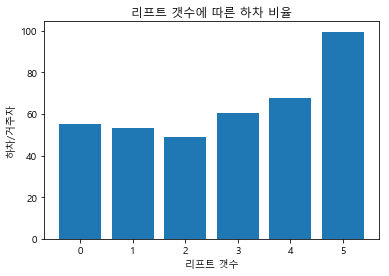

In [54]:
plt.title('리프트 갯수에 따른 하차 비율')
plt.bar(df2['리프트'], df2['하차/거주자']) #plt.bar(x축값, y축값)
plt.xticks(np.arange(0, 6))
plt.xlabel('리프트 갯수')
plt.ylabel('하차/거주자')
plt.show()

TypeError: inner() got multiple values for argument 'ax'

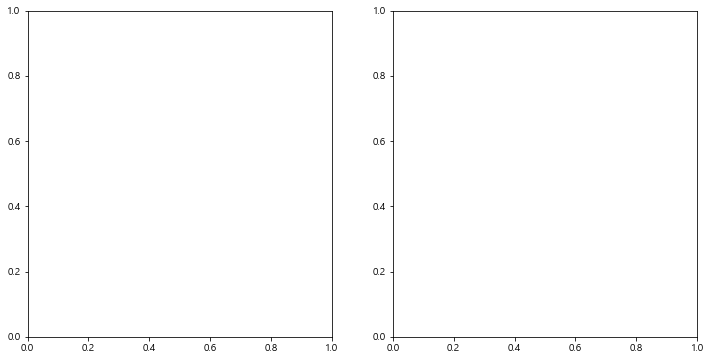

In [55]:
# f, ax = plt.subplots(1, 2, figsize=(12,6))

# plt.bar(df1['승강기'], df1['하차/거주자'], ax=ax[0]) #plt.bar(x축값, y축값)
# ax[0].set_title('승강기 갯수에 따른 하차 비율')

# plt.bar(df2['리프트'], df2['하차/거주자'], ax=ax[1]) #plt.bar(x축값, y축값)
# ax[1].set_title('리프트 갯수에 따른 하차 비율')
# plt.show()

In [56]:
df.to_excel("서울시_하차거주자수.xlsx")

# raw_data.to_excel("서울시 장애인 현황_장애유형별동별 통계.xlsx")


In [57]:
df[df['하차/거주자'] < 0.15]

,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자


In [58]:
df3 = df.sort_values(by='하차/거주자', ascending=True).head(10)
df3

,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
321,남현동,남태령역,3,0,0.930378,사당1동,1.108137,771,4,14756,5.224993,0.027108
131,답십리1동,신답역,2,0,0.442769,답십리4동,0.481296,1463,6,27869,5.249560,0.021529
7,역촌동,역촌역,2,0,0.546790,역촌동,0.000000,4001,1178,57536,6.953907,2.047414
64,불광2동,독바위역,2,0,0.586565,불광2동,0.000000,2782,6,37386,7.441288,0.016049
143,영등포본동,신길역,4,2,0.692412,영등포본동,0.000000,2173,30,27001,8.047850,0.111107
3,구산동,구산역,1,1,0.676008,구산동,0.000000,6067,490,61783,9.819853,0.793098
226,신길1동,신길역,4,2,0.838075,대방동,0.534225,2173,57,20708,10.493529,0.275256
89,응암1동,역촌역,2,0,0.701133,응암1동,0.000000,4001,108,33108,12.084693,0.326205
20,신내1동,봉화산역,2,2,1.475476,신내1동,0.000000,6303,785,51739,12.182300,1.517231
18,세곡동,복정역,1,1,1.713387,세곡동,0.000000,6335,627,51956,12.193009,1.206790


In [59]:
map = map.reset_index()
map = map.drop(['index'], axis=1)
map

,거주자 순위,지역,지하철역,승강기,리프트,역_거리,목적지,목적지_거리,하차 수,이용 수,거주자 수,하차/거주자,이용/거주자
0,321,남현동,남태령역,3,0,0.930378,사당1동,1.108137,771,4,14756,5.224993,0.027108
1,131,답십리1동,신답역,2,0,0.442769,답십리4동,0.481296,1463,6,27869,5.249560,0.021529
2,7,역촌동,역촌역,2,0,0.546790,역촌동,0.000000,4001,1178,57536,6.953907,2.047414
3,64,불광2동,독바위역,2,0,0.586565,불광2동,0.000000,2782,6,37386,7.441288,0.016049
4,143,영등포본동,신길역,4,2,0.692412,영등포본동,0.000000,2173,30,27001,8.047850,0.111107
5,3,구산동,구산역,1,1,0.676008,구산동,0.000000,6067,490,61783,9.819853,0.793098
6,226,신길1동,신길역,4,2,0.838075,대방동,0.534225,2173,57,20708,10.493529,0.275256
7,89,응암1동,역촌역,2,0,0.701133,응암1동,0.000000,4001,108,33108,12.084693,0.326205
8,20,신내1동,봉화산역,2,2,1.475476,신내1동,0.000000,6303,785,51739,12.182300,1.517231
9,18,세곡동,복정역,1,1,1.713387,세곡동,0.000000,6335,627,51956,12.193009,1.206790


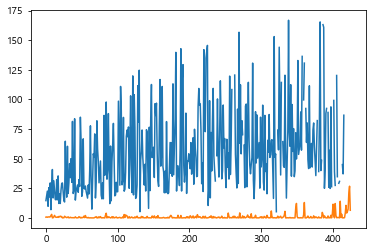

In [62]:
plt.plot(df['하차/거주자'], label='지하철')
plt.plot(df['이용/거주자'], label='콜텍시')
plt.show()